In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

In [11]:
y_train_valid -= 769
y_test -= 769

### Shape of data

In [12]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [13]:
perm = np.random.permutation(X_train_valid.shape[0])
numTrain = int(0.8*X_train_valid.shape[0])
numVal = X_train_valid.shape[0] - numTrain
Xtrain = X_train_valid[perm[0:numTrain]]
ytrain = y_train_valid[perm[0:numTrain]]
Xval = X_train_valid[perm[numTrain: ]]
yval = y_train_valid[perm[numTrain: ]]

In [14]:
from keras import layers, models

In [15]:
from keras import backend as K

In [ ]:
def Ksquare(x):
    return K.pow(x, 2)
def Klog(x):
    return K.log(x)

In [18]:
inputs = layers.Input(shape=(22, 1000))
r1 = layers.Reshape((1, 22, 1000))(inputs)
c1 = layers.Conv2D(40, (1, 25), strides=1, activation='elu',
                  data_format='channels_first')(r1)
r2 = layers.Reshape((1, 40*22, 976))(c1)
c2 = layers.Conv2D(40, (40*22, 1), strides=1, activation='elu',
                  data_format='channels_first')(r2)
sq1 = layers.Activation(Ksquare)(c2)
r3 = layers.Reshape((1, 40, 976))(sq1)
apool1 = layers.AveragePooling2D((1, 75), strides=(1, 15), 
                                 data_format = 'channels_first')(r3)
log1 = layers.Activation(Klog)(apool1)
f1 = layers.Flatten()(log1)
outputs = layers.Dense(4, activation='softmax')(f1)

In [20]:
model = models.Model(inputs = inputs, outputs = outputs)
model.compile('adam', 'sparse_categorical_crossentropy', metrics=['acc'])

In [21]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 22, 1000)          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 22, 1000)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 22, 976)       1040      
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 880, 976)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 1, 976)        35240     
_________________________________________________________________
activation_1 (Activation)    (None, 40, 1, 976)        0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 40, 976)        0   

In [22]:
loss_hist = model.fit(Xtrain, ytrain, validation_data=(Xval, yval),
                     epochs = 10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1692 samples, validate on 423 samples
Epoch 1/10
1692/1692 [==============================] - 69s 41ms/step - loss: 1.6597 - acc: 0.2996 - val_loss: 1.3925 - val_acc: 0.3593
Epoch 2/10
1692/1692 [==============================] - 62s 36ms/step - loss: 1.2525 - acc: 0.4249 - val_loss: 1.3671 - val_acc: 0.3924
Epoch 3/10
1692/1692 [==============================] - 62s 36ms/step - loss: 1.1359 - acc: 0.5035 - val_loss: 1.3060 - val_acc: 0.4184
Epoch 4/10
1692/1692 [==============================] - 62s 36ms/step - loss: 1.0122 - acc: 0.5798 - val_loss: 1.2106 - val_acc: 0.5012
Epoch 5/10
1692/1692 [==============================] - 63s 37ms/step - loss: 0.9020 - acc: 0.6359 - val_loss: 1.2249 - val_acc: 0.4846
Epoch 6/10
1692/1692 [==============================] - 62s 37ms/step - loss: 0.7688 - acc: 0.6897 - val_loss: 1.1590 - val_acc: 0.5603
Epoch 7/10
1692/1692 [====================

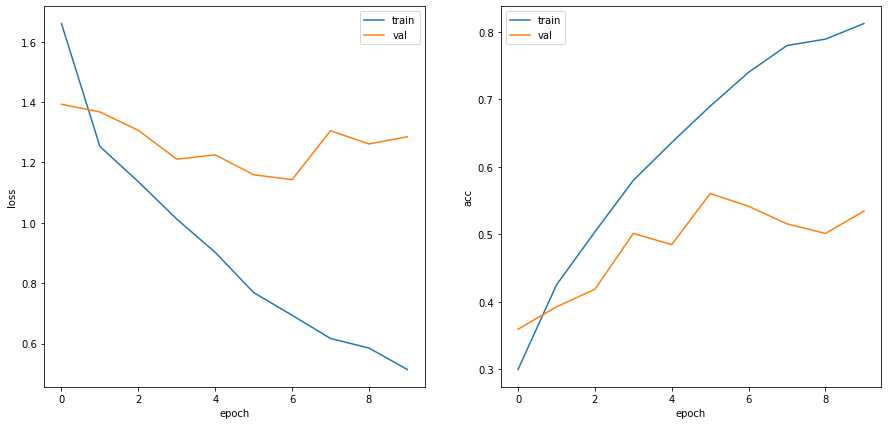

In [23]:
hist = loss_hist.history

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])

plt.subplot(1, 2, 2)
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'])